### Notebook for SHAP interpretation

In [1]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pickle
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [4]:
with open('../processed/X_test_scaled_df.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [5]:
# Loading model
with open('../models/xgboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

C:\Users\intra\AppData\Local\Temp\ipykernel_23344\3285823038.py:3: UserWarning: [13:53:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  model = pickle.load(f)


In [6]:
with open('../models/label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)

c:\Users\intra\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
class_names = le.classes_
print(f"Classes: {class_names}")

Classes: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


In [8]:
# SHAP Explainer
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

 95%|=================== | 766/805 [00:20<00:01]       

In [ ]:
print("SHAP shape:", shap_values.values.shape)  

SHAP shape: (161, 20531, 5)


Plotting SHAP values for class - BRCA


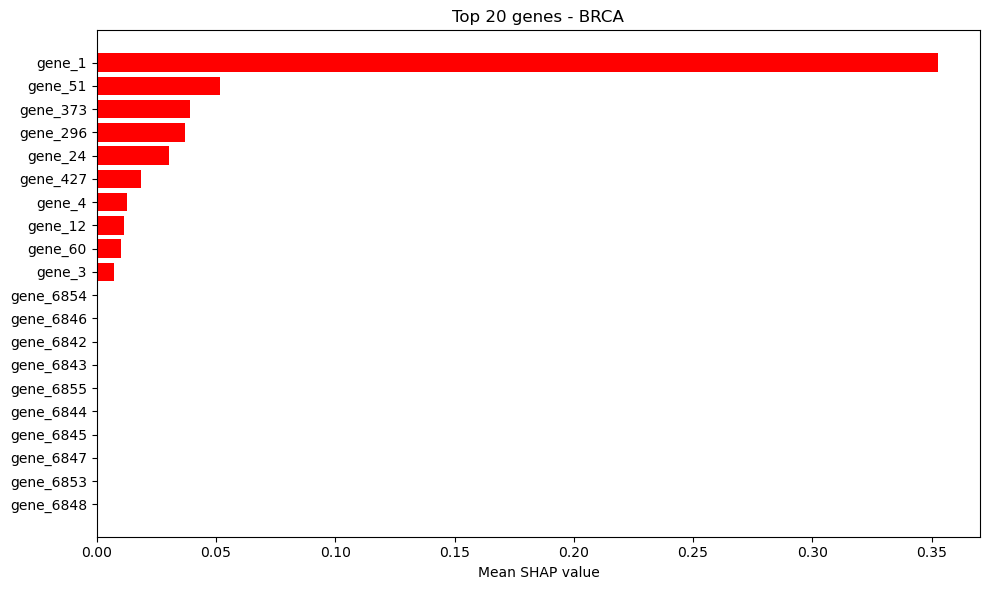

Plotting SHAP values for class - COAD


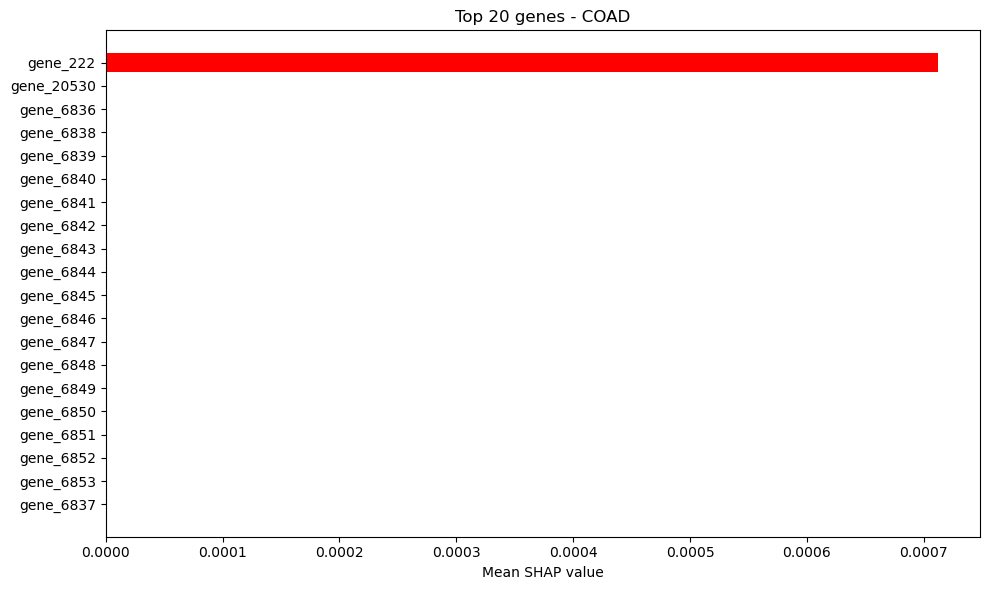

Plotting SHAP values for class - KIRC


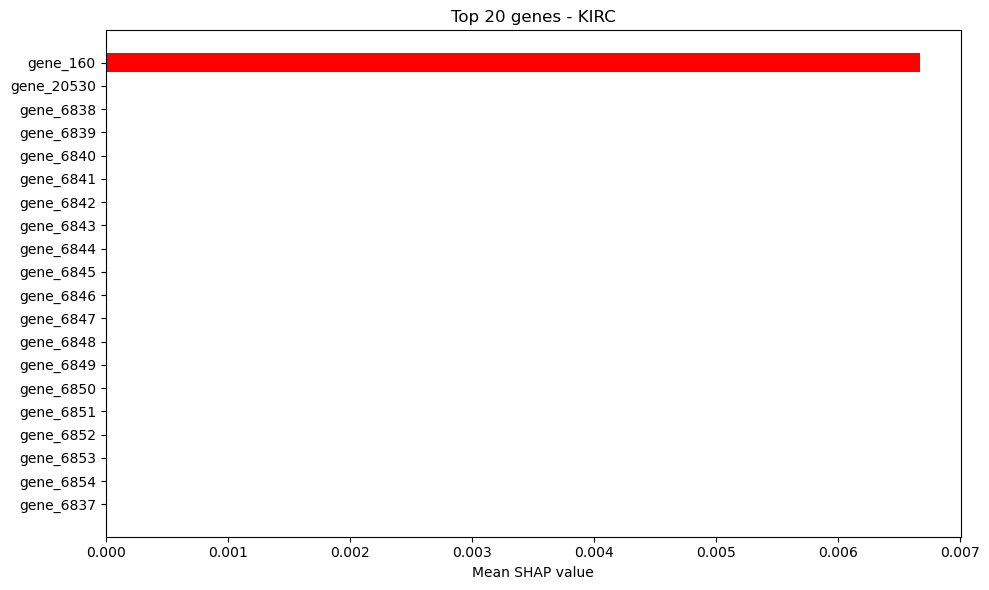

Plotting SHAP values for class - LUAD


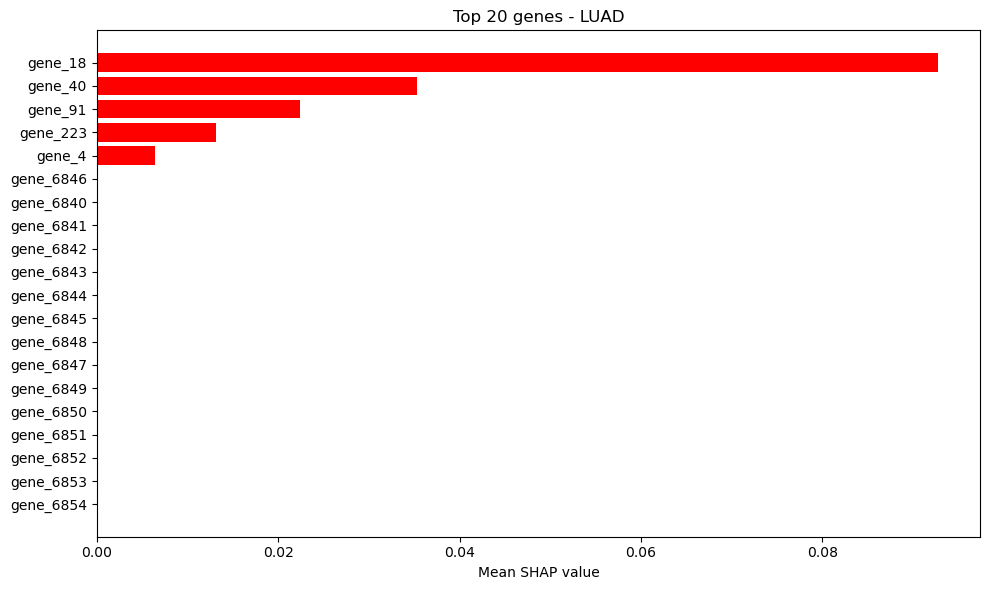

Plotting SHAP values for class - PRAD


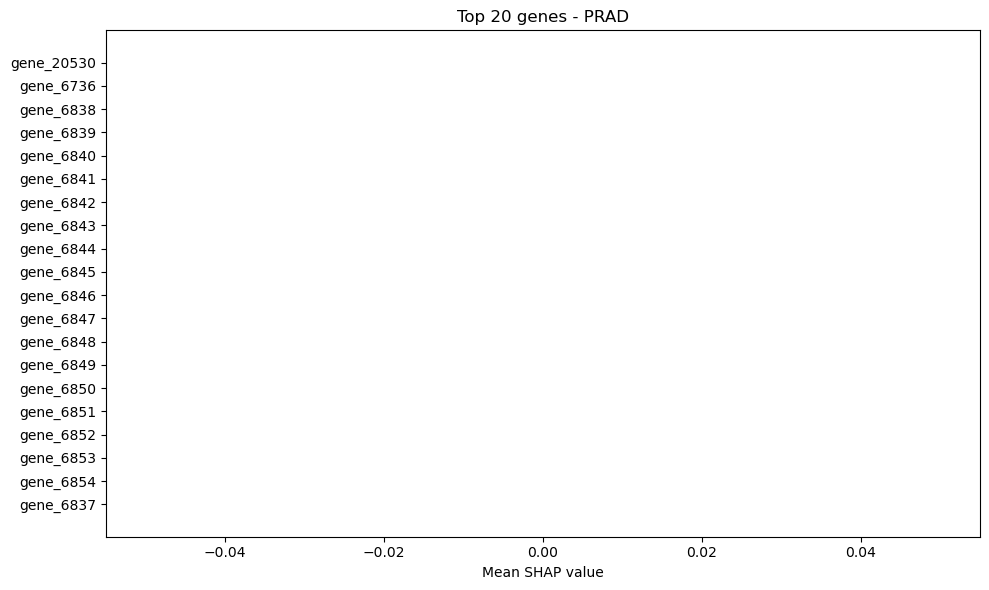

In [ ]:
# Plotting and saving SHAP plots for each class
for class_index, class_name in enumerate(class_names):
    print(f"Plotting SHAP values for class - {class_name}")
    
    # mean absolute SHAP
    mean_abs_shap = np.abs(shap_values.values[:, :, class_index]).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[-20:][::-1]
    top_genes = X_test.columns[top_indices]
    top_scores = mean_abs_shap[top_indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_genes[::-1], top_scores[::-1], color='red')
    plt.xlabel("Mean SHAP value")
    plt.title(f"Top 20 genes - {class_name}")
    plt.tight_layout()
    plt.savefig(f"../outputs/shap_bar_{class_name}.png")
    plt.show()
    plt.close()



In [12]:
# Calculating mean absolute SHAP values for PRAD class
mean_abs_shap_prad = np.abs(shap_values.values[:, :, class_names.tolist().index('PRAD')]).mean(axis=0)
print("Max mean SHAP for PRAD:", mean_abs_shap_prad.max())


Max mean SHAP for PRAD: 0.0


##### Note: The model did not find any gene strongly predictive for PRAD. So the max mean SHAP (for PRAD) is 0 and the plot of PRAD looks empty
